In [611]:
# Required libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [612]:
#Reading pastry dataset
df = pd.read_csv('../datasets/coffee_shop/pastry.csv')

df.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [613]:
# Drops null values
df.dropna(inplace = True)

In [614]:
# Replaces column to remove special character
df = df.drop(columns={'% waste'})

In [615]:
# Adds a new column with the equivalent day of week of each date
# MONDAY: 0 - SUNDAY 6
df["transaction_weekday"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.dayofweek

df = df.drop(columns={'transaction_date'})

In [616]:
df["quantity_consumed"] = df['start_of_day'] - df['quantity_sold']

In [617]:
df.head()
#create a new column for predicted values for each product_id and transaction_weekday

,sales_outlet_id,product_id,start_of_day,quantity_sold,waste,transaction_weekday,quantity_consumed
0,3,69,18,8,10,0,10
1,3,70,18,12,6,0,6
2,3,71,18,8,10,0,10
3,3,72,48,9,39,0,39
4,3,73,18,9,9,0,9


In [618]:
df.describe()

,sales_outlet_id,product_id,start_of_day,quantity_sold,waste,transaction_weekday,quantity_consumed
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,5.394137,70.983713,24.058632,9.296417,14.657980,2.993485,14.762215
std,2.049477,1.417582,12.063414,5.440115,11.202108,2.022736,11.109915
min,3.000000,69.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,70.000000,18.000000,6.000000,8.000000,1.000000,8.000000
50%,5.000000,71.000000,18.000000,8.000000,11.000000,3.000000,11.000000
75%,8.000000,72.000000,18.000000,11.000000,15.000000,5.000000,15.000000
max,8.000000,73.000000,48.000000,32.000000,47.000000,6.000000,47.000000


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sales_outlet_id      307 non-null    int64
 1   product_id           307 non-null    int64
 2   start_of_day         307 non-null    int64
 3   quantity_sold        307 non-null    int64
 4   waste                307 non-null    int64
 5   transaction_weekday  307 non-null    int64
 6   quantity_consumed    307 non-null    int64
dtypes: int64(7)
memory usage: 19.2 KB


# Data Analysis

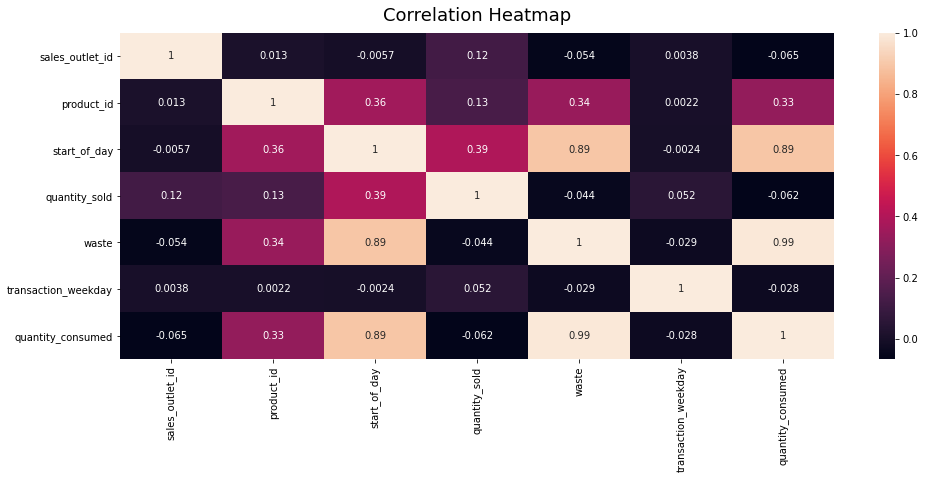

In [620]:
#  Displays the data correlation between the features.
#  Strong correlation between the start_of_day and the waste
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

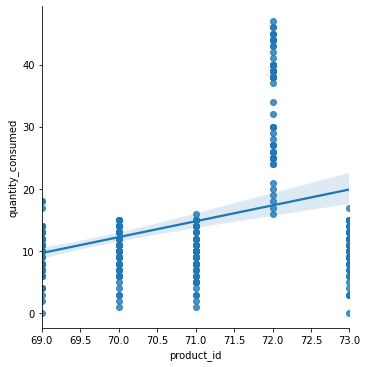

In [621]:
sns.lmplot(x='product_id', y ='quantity_consumed', data=df)

# Creating Data Model

In [634]:
#Creating a copy of df, and filtering the features to define the model.
df_copy = df.copy()
df_copy = df_copy[["product_id", "quantity_consumed", "transaction_weekday", "waste"]]

In [635]:
target_column = ['quantity_consumed'] 
predictors = list(set(list(df_copy.columns))-set(target_column))
df_copy.describe()

,product_id,quantity_consumed,transaction_weekday,waste
count,307.000000,307.000000,307.000000,307.000000
mean,70.983713,14.762215,2.993485,14.657980
std,1.417582,11.109915,2.022736,11.202108
min,69.000000,0.000000,0.000000,0.000000
25%,70.000000,8.000000,1.000000,8.000000
50%,71.000000,11.000000,3.000000,11.000000
75%,72.000000,15.000000,5.000000,15.000000
max,73.000000,47.000000,6.000000,47.000000


In [636]:
#Creating the training and test data
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape); print(X_test.shape)

(214, 3)
(93, 3)


# Linear Regression 

In [656]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

In [658]:
# Coefficients for product_id, waste, and transaction_weekday, respectively.
coeffecients = pd.DataFrame(lr.coef_[0], df[predictors].columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
product_id,-0.064427
waste,0.989267
transaction_weekday,0.001747


In [659]:
pred_test_lr = lr.predict(X_test)

In [660]:
# Using sklearn metrics R2 Score and Mean Squared Error to validate the performance of the model.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Root Mean Square Deviation: " + str(np.sqrt(mean_squared_error(y_test,pred_test_lr))))
print("Coefficient of Determination: " + str(r2_score(y_test, pred_test_lr)))

Root Mean Square Deviation: 1.8384718366958017
Coefficient of Determination: 0.967974659104179


Text(0, 0.5, 'Prediction Data')

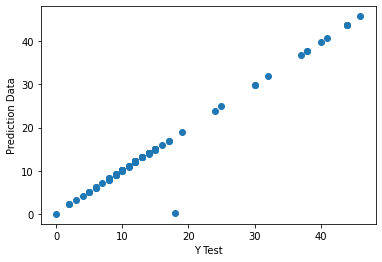

In [661]:
plt.scatter(y_test, pred_test_lr)
plt.xlabel('Y Test')
plt.ylabel('Prediction Data')

In [662]:
myvals = np.array([70, 4, 0]).reshape(1, -1)
print("Number of this pastry item needed on a Friday: " 
      + str(math.ceil(lr_model.predict(myvals)[0][0])))

Number of this pastry item needed on a Friday: 5


In [663]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr_model = rr.fit(X_train, y_train)

In [664]:
pred_test_rr = rr.predict(X_test)

In [665]:
# Using sklearn metrics R2 Score and Mean Squared Error to validate the performance of the model.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Root Mean Square Deviation: " + str(np.sqrt(mean_squared_error(y_test,pred_test_rr))))
print("Coefficient of Determination: " + str(r2_score(y_test, pred_test_rr)))

Root Mean Square Deviation: 1.8384679504479402
Coefficient of Determination: 0.9679747944973665
